In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
from sklearn.neighbors import KNeighborsRegressor
#train_test_split를 정의 해줘야 하기에 아래 라이브러리 만들어줍니다.
from sklearn.model_selection import train_test_split
#경고창 삭제하기
import warnings
warnings.filterwarnings('ignore')


#폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

In [ ]:
#군집
#데이터 집합을 클러스터cluster라는 그룹으로 분할
#어느 클러스터에 속할지 예측
#K – Means clustering
#가장 간단하고 널리 사용됨
#임의의 클러스터 중심에 데이터 포인트를 할당
#평균을 내어 다시 클러스터 중심을 계산
#클러스터에 할당되는 데이터 포인트의 변화가 없으면 알고리즘 종료

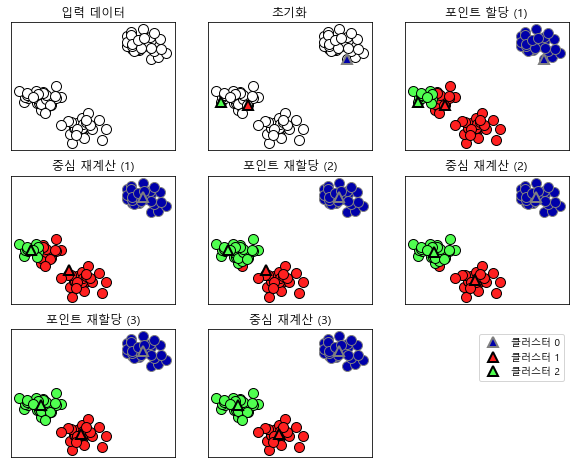

In [3]:
mglearn.plots.plot_kmeans_algorithm()

In [ ]:
#3개의 클러스터
#초기점을 중심으로 각 데이터 포인트의
#거리 계산
#가장 가까운 초기점 3개중 하나로
#각 데이터의 클러스터 결정
#각 클러스터별 초기점에서의
#거리의 평균을 구해 새로운 중심점 할당

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# 2차원 데이터를 생성
X, y = make_blobs(random_state=1)
# 군집 모델을 만듭니다
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
print(kmeans.labels_)

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


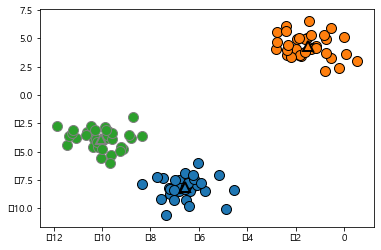

In [10]:
mglearn.discrete_scatter(X[:,0],X[:,1],kmeans.labels_,markers='o')
mglearn.discrete_scatter(
kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],[0,1,2],
markers='^',markeredgewidth=2)

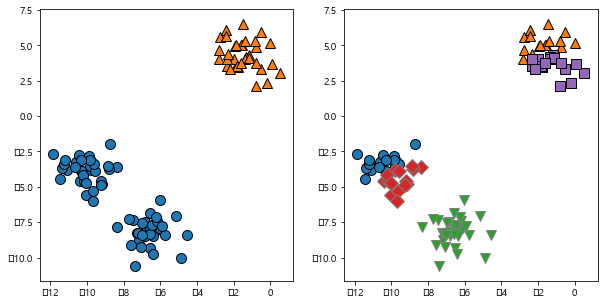

In [12]:
fig,axes = plt.subplots(1,2,figsize=(10,5))

#이번에는 클러스터 수를 줄여 보겠습니다.
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:,0],X[:,1],assignments,ax=axes[0])

#5개의 클러스터 중심으로 나타내봅니다.
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:,0],X[:,1],assignments,ax=axes[1])

In [ ]:
#클러스터의 수를 조절 할 수 있는 것은 kmeans= KMeans(n_cluster = n)
#로 조절 할 수 있습니다

In [ ]:
#K-means 알고리즘의 한계
# 클러스터 수를 명시적으로 결정해야한다
# 클러스터의 중심이 하나여서 둥근 형태
# 반경이 동일하다고 가정
# 클러스터 0, 1에 멀리 떨어진 포인트도 포함
# 방향을 고려하지 않고 거리만 고려
#레이블이 의미가 없음
# 1차시도에서 0,1,2
# 2차시도에서는 1,2,0이 될수 있음

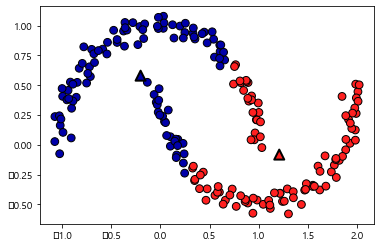

In [15]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples= 200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

#클러스터의 할당과 클러스터 중심을 표시합니다.
plt.scatter(X[:,0],X[:,1],c=y_pred,cmap=mglearn.cm2,s=60,edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
marker='^',c=[mglearn.cm2(0),mglearn.cm2(1)],s=100,linewidth=2,
            edgecolors='k')
plt.xlabel=("특성 0")
plt.yabel=("특성 1")

In [ ]:
#더 복잡한 형태여서 k-평균의 성능이 나빠진 것을 보여줍니다
#거리만 고려하기에 좋지 않는 것 같습니다.

클러스터 레이블 : 
 [4 7 6 9 7 7 4 1 4 1 8 3 7 1 0 4 2 3 2 0 5 1 2 1 8 6 7 5 6 2 4 8 1 6 4 5 3
 4 0 6 3 8 2 6 7 8 4 0 6 1 0 3 5 9 1 4 2 1 2 8 3 9 7 4 1 9 8 7 8 9 3 9 3 6
 1 9 6 4 2 3 5 8 3 5 6 8 4 8 3 5 2 4 5 0 5 7 7 3 9 6 1 5 8 4 9 6 9 8 7 2 0
 8 8 9 4 1 2 5 3 4 4 0 6 8 6 0 4 6 1 5 4 0 9 3 1 7 1 9 5 4 6 6 2 8 8 4 6 1
 2 6 3 7 4 2 3 8 1 3 2 2 6 1 2 7 3 7 2 3 7 1 2 9 0 0 6 1 5 0 0 2 7 0 5 7 5
 2 8 3 9 0 9 2 4 4 6 0 5 6 2 7]


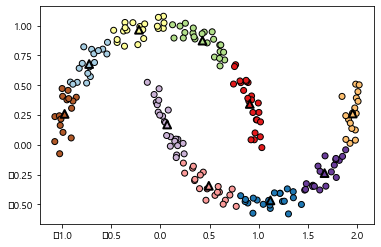

In [25]:
#하지만 벡터 양자화를 통해 : 연속적인 값을 그룹화햐여 대표값을 표현하고
#kmeans을 하나의 성분으로 데이터 표현을 시킨다면 더 좋은 효과를 볼 수 있습니다.
X,y = make_moons(n_samples= 200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=10,random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

#클러스터의 할당과 클러스터 중심을 표시합니다.
plt.scatter(X[:,0],X[:,1],c=y_pred,cmap='Paired',edgecolors='black')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=60,
marker='^',c=range(kmeans.n_clusters),linewidth=2,cmap='Paired',
            edgecolors='black')
plt.xlabel=("특성 0")
plt.ylabel=("특성 1")
print("클러스터 레이블 : \n",y_pred)

In [ ]:
#10차원 형태를 이용하면 선형 모델을 사용해 두개의 반달 모양을 잘 구분 할 수 있습니다.


In [ ]:
#병합군집
#각 데이터가 하나의 클러스터
#지정된 클러스터 개수가 될 때까지 가까운 두 클러스터를 병합
#AgglomerativeClustering(n_clusters=2, affinity=’euclidean’, memory=None,
#connectivity=None, compute_full_tree=’auto’, linkage=’ward’,
#pooling_func=’deprecated’)
#linkage : 비슷한 클러스터 선택 옵션
#ward: 기본값, 클러스터 내의 분산을 가장 작게 증가시키는 두 클러스터 병합
# 클러스터의 크기가 비슷해짐
# average: 클러스터 포인트 사이의 평균 거리가 가장 작은 두 클러스터 병합
# complete: 클러스터 포인트 사이의 최대 거리가 가장 짧은 두 클러스터 병합

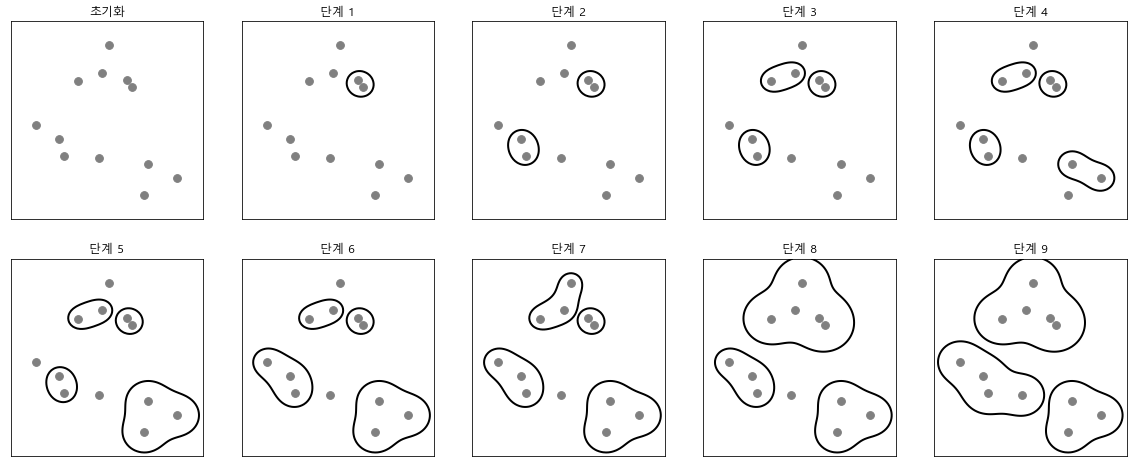

In [19]:
mglearn.plots.plot_agglomerative_algorithm()

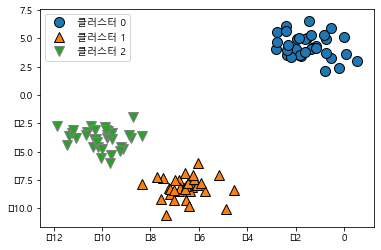

In [23]:
#각 단계에서 가장 가까운 두 클러스터가 합쳐집니다.
#이런 식으로 단계 9에 이르면 클러스터가 세 게만 남게 됩니다.

from sklearn.cluster import AgglomerativeClustering
X,y=make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)
#Fit메소드에서 찾은 labels_를 반환
#Predict method가 없음
#새로운 포인트에 대해 예측할 수 없음
#데이터의 분석에만 이용

mglearn.discrete_scatter(X[:,0],X[:,1],assignment)
plt.legend(["클러스터 0","클러스터 1","클러스터 2"],loc ="best")
plt.xlabel=("특성 0")
plt.ylabel=("특성 1")

In [ ]:
#DBSCAN()
#데이터가 많은 밀집 지역(dense region)을 찾아 다른 지역과 구분하는 클러스터를
#구성함(밀도에 따라 클러스터 연결)

In [26]:
from sklearn.cluster import DBSCAN
X,y = make_blobs(random_state=0,n_samples=12)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X) 
print("클러스터 레이블 :\n",clusters)

클러스터 레이블 :
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [ ]:
#12개 샘플이 모두 노이즈가 -1이 잡음 포인트

min_samples: 2 eps: 1.000000  클러스터: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  클러스터: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  클러스터: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  클러스터: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  클러스터: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  클러스터: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  클러스터: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  클러스터: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  클러스터: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  클러스터: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  클러스터: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  클러스터: [0 0 0 0 0 0 0 0 0 0 0 0]


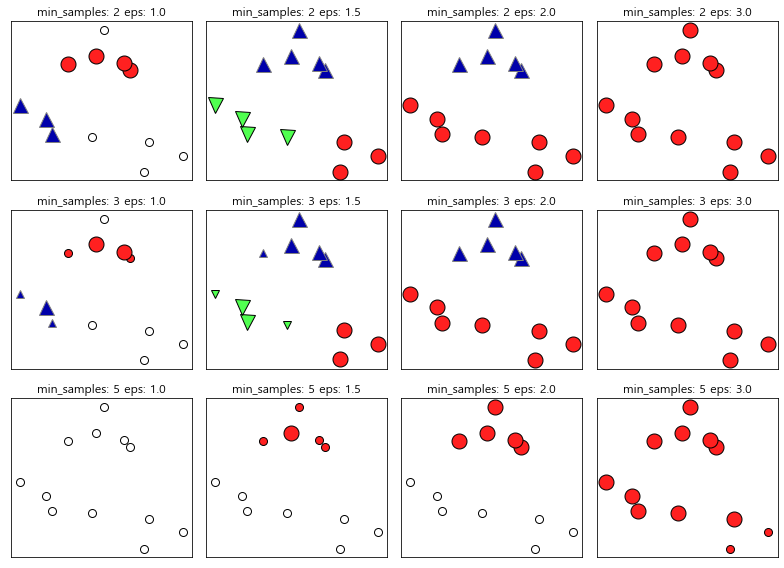

In [27]:
mglearn.plots.plot_dbscan()

In [ ]:
#min 샘플이 커지면 핵심포이튼가 줄고 노이즈가 증가 합니다
#클러스틔 최소크기를 결정 하는 거죠
#eps 크면 모든 포인트가 하나의 클래스
#eps 작으면 핵심포인트가 없을 수 있따.

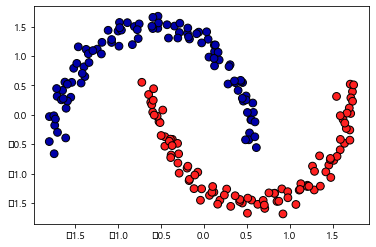

In [33]:
X,y = make_moons(n_samples=200,noise=0.05,random_state=0)

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X)
X_scaled= scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled) 
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=clusters,cmap=mglearn.cm2,s=60,edgecolors='black')
plt.xlabel=("특성 0")
plt.ylabel=("특성 1")

In [ ]:
# 두개의 반달 모양을 정확이 찾아 구분하였습니다
#클러스터 개수 2개를 만들어 내므로 매개 변수 설정이 잘 맞는 것 같습니다
#eps를 0.2로 내리면 너무 많은 8개의 클러스터를 만들어 냅니다.

In [35]:
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
 #200개 샘플생성
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
#스케일조정
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
DBSCAN()]
#모델 리스트 생성
adjusted_rand_score(y, clusters)

1.0

In [ ]:
#실루엣(silhouette) 계수
#클러스터의 밀집정도 계산/높을 수록 좋으며 최대 1
#모양이 복잡할 때는 밀집 정도를 평가하는 것이 잘 맞지 않음

In [ ]:
#K-means, DBSCAN, 병합군집
#대량의 데이터셋 적용가능
#이해 및 구현이 쉽다
#K-means : 클러스터 개수 지정 필요
# 클러스터 중심으로 클러스터 구분

#벡터 양자화(분해방법) :데이터 포인트를 클러스터 중심으로 표현
#DBSCAN : eps 로 클러스터 크기 간접 조정
# 클러스터 개수 자동 조정
# 잡음포인트 인식가능
# 클러스터 모양인식
# 크기가 다른 클러스터 생성(장점 또는 단점)
# 병합군집 : 덴더그램으로 분할 계층도 생성